# Testing ProbaVis Class

## Imports

In [1]:
import importlib

import pandas as pd

from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.datasets import make_classification, load_iris

from ipywidgets import interactive

import multiclass_proba_contour as mpc

In [2]:
importlib.reload(mpc)

<module 'multiclass_proba_contour' from 'C:\\Users\\Semyon\\Documents\\Python\\20_Projects\\mpc_clone\\multiclass-proba-contour\\multiclass_proba_contour.py'>

## Generate a Data Set

In [3]:
data, target = make_classification(
    n_samples=160, n_features=2, n_informative=2, n_redundant=0,
    n_classes=4, n_clusters_per_class=1, weights=[.2,.3,.4,.1], scale=[5,2],
    hypercube=False, class_sep=2, random_state=5
)

data = pd.DataFrame(data, columns=[f"Feature #{x}" for x in range(data.shape[1])])

## Logistic Regression

In [4]:
test = mpc.ProbaVis(LogisticRegression(), data, target, [0,1], grid_res=(200,100))

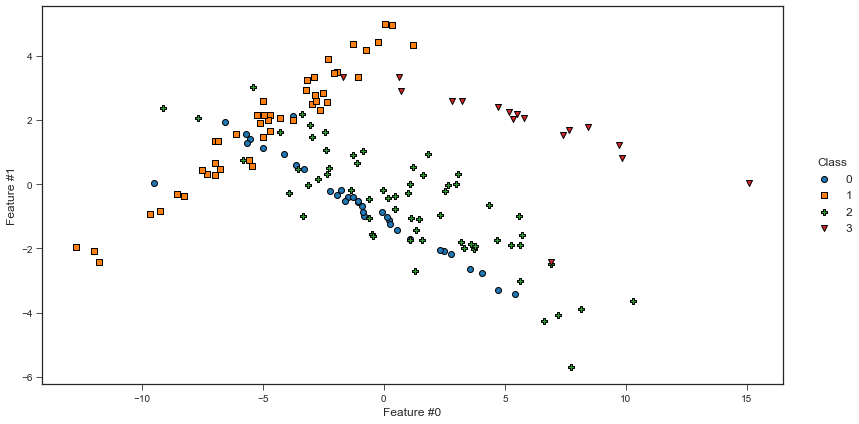

In [5]:
test.plot(contour_on=False)

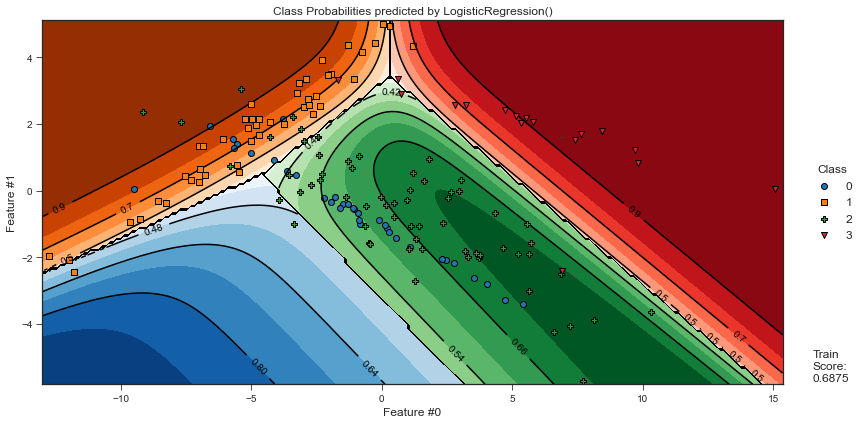

In [6]:
test.plot()

## Random Forest

In [7]:
test.set_model(RandomForestClassifier(random_state=1, min_impurity_decrease=.01))

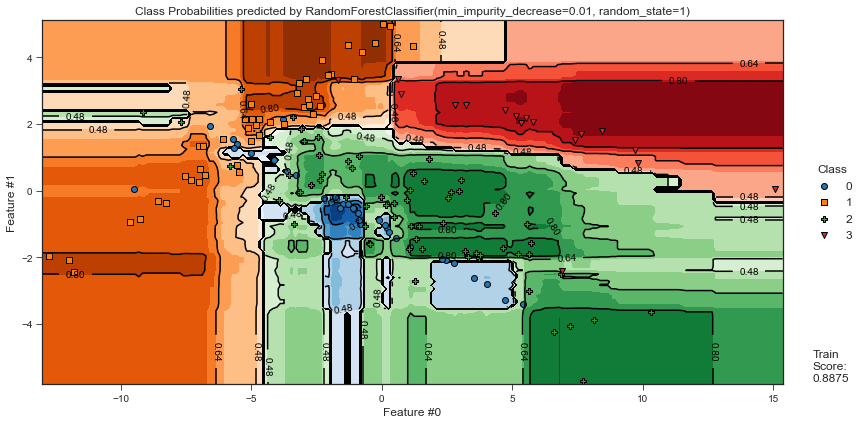

In [8]:
test.plot()

In [9]:
interactive(
    test.replot,
    contour_on = [True, False],
    criterion=["gini", "entropy"],
    n_estimators=(1,200), 
    max_depth=(1,20),
    min_samples_leaf=(1,20),
    min_impurity_decrease=(0, 0.02, 0.01)
)

interactive(children=(Dropdown(description='contour_on', options=(True, False), value=True), Dropdown(descript…

## Boosting

In [10]:
test.set_model(HistGradientBoostingClassifier(random_state=1))

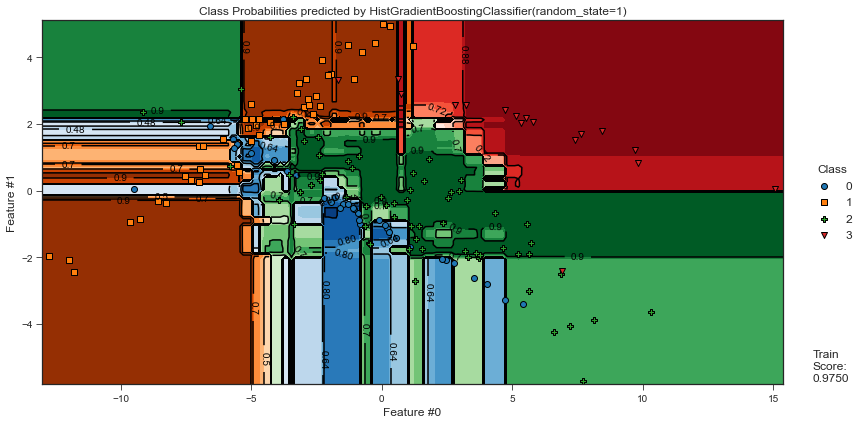

In [11]:
test.plot()

In [12]:
interactive(
    test.replot,
    contour_on = [True, False],
    learning_rate=(.1, 2, .01),
    max_iter=(100, 1_000, 100),
    max_leaf_nodes=(1,100,1),
    max_depth=(1,20,1),
)

interactive(children=(Dropdown(description='contour_on', options=(True, False), value=True), FloatSlider(value…